# Week 5 Assignment

In [36]:
# get a dataset from Kaggle
# do EDA
# https://www.kaggle.com/szamil/who-suicide-statistics/version/1
'''Submit one Py notebook with the following:
1) Select new dataset
2) Read csv/txt with Pandas
3) Perform EDA (Early Data Exploration) (descriptive statistics, histograms)
4) Use groupby, correlations to understand the dataset
5) Plot data with Matplotlib for visualizing the dataset
6) Identify target and factors
7) Explain your dataset with high-level analysis

Dataset repositories:
https://archive.ics.uci.edu/ml/datasets.html
https://www.kaggle.com/datasets'''

# Q1 - Which gender commits more suicide
# Q2 - Which age range commits more per gender
# Q3 Per capita basis percentage of population over time

'Submit one Py notebook with the following:\n1) Select new dataset\n2) Read csv/txt with Pandas\n3) Perform EDA (Early Data Exploration) (descriptive statistics, histograms)\n4) Use groupby, correlations to understand the dataset\n5) Plot data with Matplotlib for visualizing the dataset\n6) Identify target and factors\n7) Explain your dataset with high-level analysis\n\nDataset repositories:\nhttps://archive.ics.uci.edu/ml/datasets.html\nhttps://www.kaggle.com/datasets'

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
df = pd.read_csv("who_suicide_statistics.csv")

In [39]:
print(df)

                    country  year     sex          age  suicides_no  \
0                   Albania  1985  female  15-24 years          NaN   
1                   Albania  1985  female  25-34 years          NaN   
2                   Albania  1985  female  35-54 years          NaN   
3                   Albania  1985  female   5-14 years          NaN   
4                   Albania  1985  female  55-74 years          NaN   
5                   Albania  1985  female    75+ years          NaN   
6                   Albania  1985    male  15-24 years          NaN   
7                   Albania  1985    male  25-34 years          NaN   
8                   Albania  1985    male  35-54 years          NaN   
9                   Albania  1985    male   5-14 years          NaN   
10                  Albania  1985    male  55-74 years          NaN   
11                  Albania  1985    male    75+ years          NaN   
12                  Albania  1986  female  15-24 years          NaN   
13    

In [40]:
# should I drop rows with NaN for number of suicicdes?
# should i create catogiries that are non numbers
# such as country, sex and age ranges? 

df.describe()

,year,suicides_no,population
count,43776.000000,41520.000000,3.831600e+04
mean,1998.502467,193.315390,1.664091e+06
std,10.338711,800.589926,3.647231e+06
min,1979.000000,0.000000,2.590000e+02
25%,1990.000000,1.000000,8.511275e+04
50%,1999.000000,14.000000,3.806550e+05
75%,2007.000000,91.000000,1.305698e+06
max,2016.000000,22338.000000,4.380521e+07


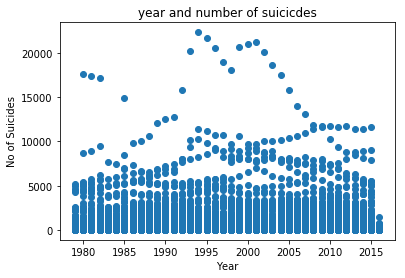

In [41]:
# let's plot year and no of suicides
plt.title("year and number of suicicdes")
plt.xlabel("Year")
plt.ylabel("No of Suicides")
plt.scatter(df['year'],df['suicides_no'])
plt.show()

In [42]:
# check for correlations
df.corr()

,year,suicides_no,population
year,1.000000,-0.011985,0.027016
suicides_no,-0.011985,1.000000,0.611406
population,0.027016,0.611406,1.000000


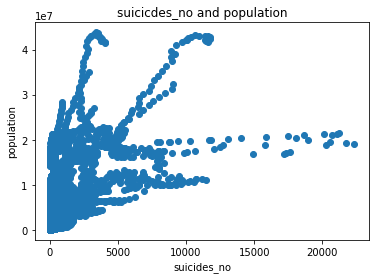

In [43]:
plt.title("suicicdes_no and population") 
plt.xlabel("suicides_no") 
plt.ylabel("population") 
plt.scatter(df['suicides_no'],df['population'])
plt.show()

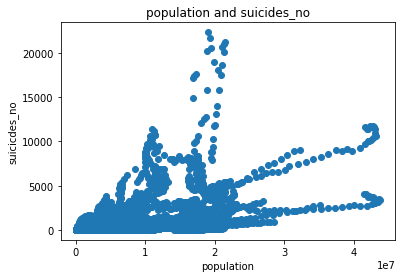

In [44]:
# ugly chart earlier. let's reverse it
plt.title("population and suicides_no") 
plt.xlabel("population") 
plt.ylabel("suicicdes_no") 
plt.scatter(df['population'],df['suicides_no'])
plt.show()

In [45]:
# let's group by country
df1 = df.groupby("country").year.describe()
print(df1)

                                    count         mean        std     min  \
country                                                                     
Albania                             372.0  2000.000000   8.956318  1985.0   
Anguilla                            348.0  1999.517241  10.511815  1983.0   
Antigua and Barbuda                 336.0  1998.892857   9.441753  1983.0   
Argentina                           444.0  1997.000000  10.689122  1979.0   
Armenia                             420.0  1998.914286  10.250434  1981.0   
Aruba                               240.0  2004.550000   7.502134  1987.0   
Australia                           444.0  1997.000000  10.689122  1979.0   
Austria                             456.0  1997.500000  10.977900  1979.0   
Azerbaijan                          300.0  1993.920000   7.479309  1981.0   
Bahamas                             348.0  1997.517241  10.382719  1979.0   
Bahrain                             252.0  2002.809524   8.184831  1985.0   

In [46]:
df2 = df.groupby("year", as_index = False)["suicides_no","population"].sum()

type(df2)

pandas.core.frame.DataFrame

In [47]:
#get list of column names
print(df2)

    year  suicides_no    population
0   1979      92790.0  9.841685e+08
1   1980     153548.0  1.220095e+09
2   1981     178014.0  1.310398e+09
3   1982     182893.0  1.276454e+09
4   1983     122430.0  1.333573e+09
5   1984     124427.0  1.217641e+09
6   1985     197533.0  1.404640e+09
7   1986     189225.0  1.425017e+09
8   1987     186364.0  1.472508e+09
9   1988     181416.0  1.393106e+09
10  1989     186043.0  1.407480e+09
11  1990     205507.0  1.549001e+09
12  1991     204756.0  1.597419e+09
13  1992     219100.0  1.674393e+09
14  1993     229243.0  1.589658e+09
15  1994     240628.0  1.660033e+09
16  1995     245915.0  1.662675e+09
17  1996     250353.0  1.754775e+09
18  1997     244322.0  1.771464e+09
19  1998     253279.0  1.794330e+09
20  1999     259984.0  1.809551e+09
21  2000     259905.0  1.895363e+09
22  2001     255071.0  1.854263e+09
23  2002     260401.0  1.927376e+09
24  2003     260429.0  1.945385e+09
25  2004     245249.0  1.866378e+09
26  2005     238622.0  1.884

In [48]:
# convert to integers so that we can graph
df2.astype(dtype='int32', copy=True, errors='raise')

,year,suicides_no,population
0,1979,92790,984168507
1,1980,153548,1220094727
2,1981,178014,1310398346
3,1982,182893,1276454146
4,1983,122430,1333572968
5,1984,124427,1217640586
6,1985,197533,1404640168
7,1986,189225,1425016672
8,1987,186364,1472508243
9,1988,181416,1393106049


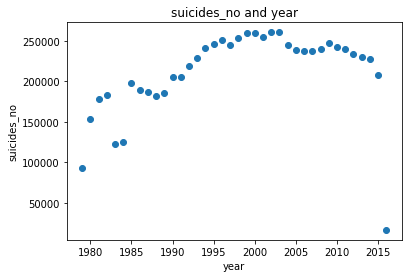

In [35]:
#plot years against suicide numbers
plt.title("suicides_no and year") 
plt.xlabel("year") 
plt.ylabel("suicides_no") 
plt.scatter(df2['year'],df2['suicides_no'])
plt.show()

In [49]:
# let's see if we can create a 3rd column which is a percentage
# reference
# https://stackoverflow.com/questions/14059094/i-want-to-multiply-two-columns-in-a-pandas-dataframe-and-add-the-result-into-a-n
# example: orders_df['Value'] = orders_df.Prices * orders_df.Amount * orders_df.C
df2['percentage'] = df2.suicides_no / df2.population
print(df2)

    year  suicides_no    population  percentage
0   1979      92790.0  9.841685e+08    0.000094
1   1980     153548.0  1.220095e+09    0.000126
2   1981     178014.0  1.310398e+09    0.000136
3   1982     182893.0  1.276454e+09    0.000143
4   1983     122430.0  1.333573e+09    0.000092
5   1984     124427.0  1.217641e+09    0.000102
6   1985     197533.0  1.404640e+09    0.000141
7   1986     189225.0  1.425017e+09    0.000133
8   1987     186364.0  1.472508e+09    0.000127
9   1988     181416.0  1.393106e+09    0.000130
10  1989     186043.0  1.407480e+09    0.000132
11  1990     205507.0  1.549001e+09    0.000133
12  1991     204756.0  1.597419e+09    0.000128
13  1992     219100.0  1.674393e+09    0.000131
14  1993     229243.0  1.589658e+09    0.000144
15  1994     240628.0  1.660033e+09    0.000145
16  1995     245915.0  1.662675e+09    0.000148
17  1996     250353.0  1.754775e+09    0.000143
18  1997     244322.0  1.771464e+09    0.000138
19  1998     253279.0  1.794330e+09    0

In [11]:
import seaborn as sns
sns.set(style="darkgrid")
current_palette = sns.color_palette("bright")
# sns.palplot("bright")

In [12]:
sns.regplot(x="year",y="suicides_no",data=df2)

KeyError: 'year'

In [10]:
df2.head()

NameError: name 'df2' is not defined

In [17]:
df2.mean()

count     1092.631579
mean       192.701193
std        775.377767
min          0.000000
25%          0.980263
50%         14.236842
75%         93.611842
max      14469.184211
dtype: float64

KeyError: 'year'

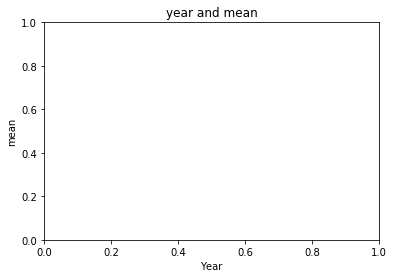

In [18]:
# let's plot year and no of suicides
plt.title("year and mean")
plt.xlabel("Year")
plt.ylabel("mean")
plt.scatter(df2['year'],df2['mean'])
plt.show()

In [ ]:
# that didn't work. maybe we group by year and sum up